# Step 1. 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기

## (1) 맥북의 중고가를 결정짓는 변수는 무엇일까? 데이터 확인하기

In [ ]:
import pandas as pd

In [414]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터셋 업로드
from google.colab import files
myfile = files.upload()

Saving macbook_test.csv to macbook_test.csv
Saving macbook.csv to macbook.csv
Saving multi_macbook_test.csv to multi_macbook_test.csv
Saving multi_macbook.csv to multi_macbook.csv


In [419]:
# 데이터 확인하기
macbook = pd.read_csv("macbook.csv")
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [ ]:
#데이터 시각화
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

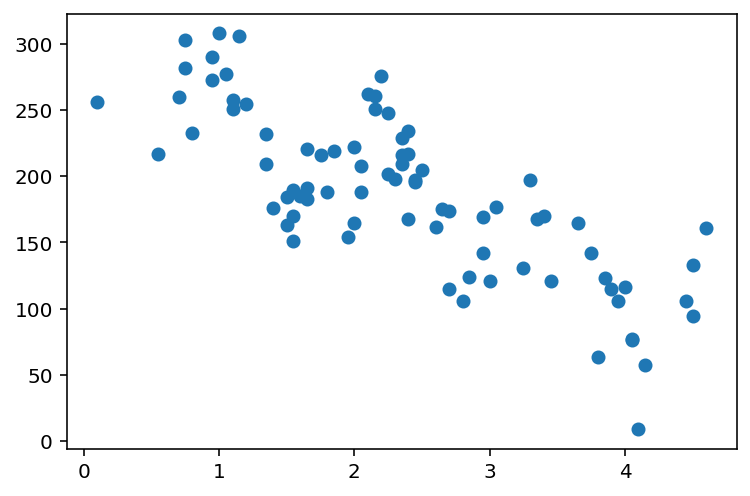

In [ ]:
#matplotlib으로 2차원 그래프 그리기
plt.scatter(macbook['used_years'],macbook['price'])
plt.show()

In [ ]:
#상관계수 구하기
import numpy as np
np.corrcoef(macbook['used_years'],macbook['price'])

#음의 상관관계를 보임을 알 수 있다.

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

## (2) "모델"을 세운다는 것, 그에 대한 의미 이해하기

In [ ]:
#입력과 출력 정의하기

x = macbook['used_years'].values
y = macbook['price'].values

In [ ]:
#일차함수 모델 정의하기
def model(x,w,b):
  y = w * x + b
  return y


#test
#y = 2x+1
model(x=5,w=2,b=1)

11

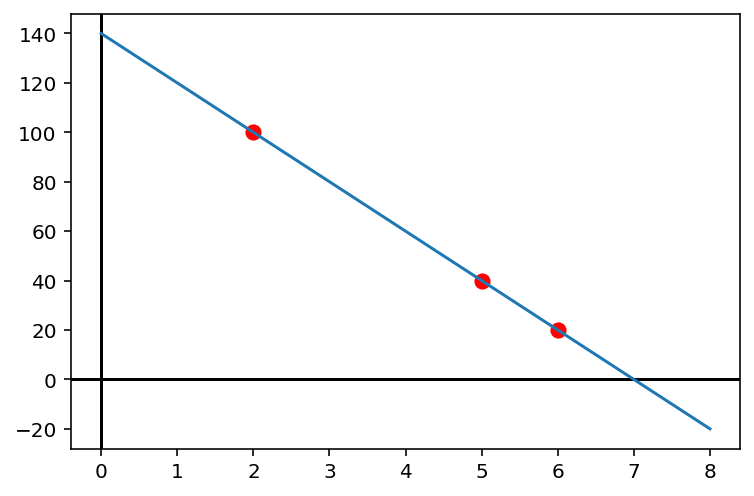

In [ ]:
#모델 학습이란?

#x,y축 그리기
plt.axvline(x=0,c='black')
plt.axhline(y=0,c='black')

#y=wx+b 일차함수 그리기
x = np.linspace(0,8,9)
y = model(x,w=-20,b=140)
plt.plot(y)

x_data = [2,5,6]
y_data = [100,40,20]
plt.scatter(x_data,y_data,c='r',s=50)

plt.show()

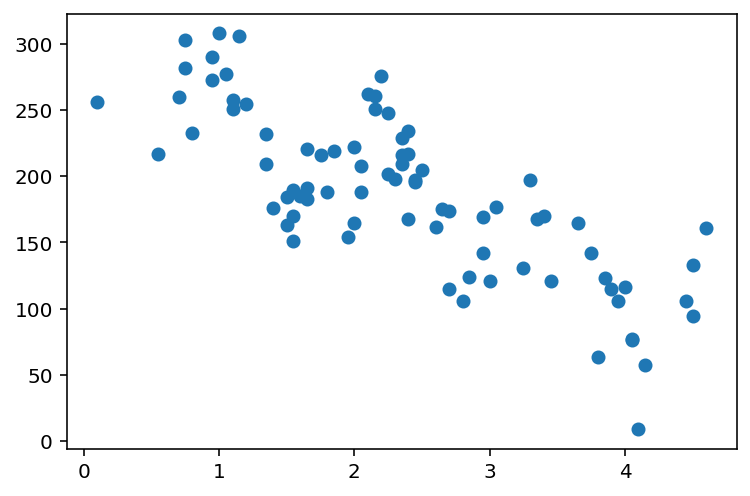

In [ ]:
#오차를 최소화하는 모델

plt.scatter(macbook['used_years'],macbook['price'])
plt.show()

## (3) 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기

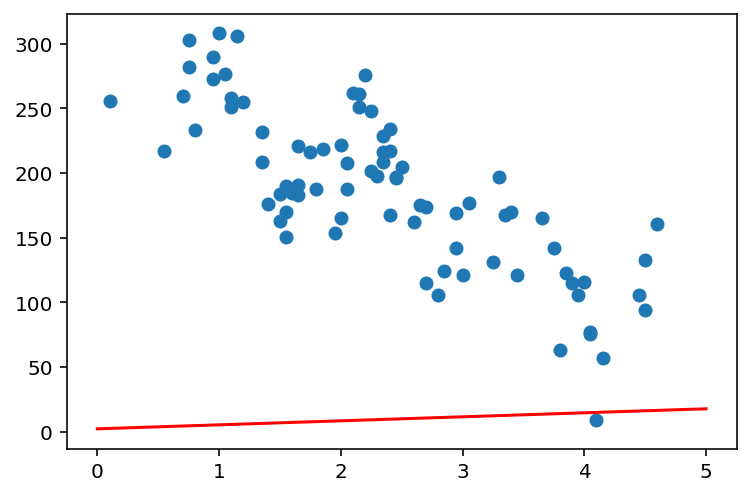

In [ ]:
# 1) 모델이 출력하는 값과 실제 정답 간의 차이를 계산하고, 2) 그 차이를 단계적으로 줄여나가는 순서로 모델을 학습


w = 3.1
b = 2.3

x = np.linspace(0,5,6)
y = model(x,w,b)
plt.plot(y,c='r')

plt.scatter(macbook['used_years'],macbook['price'])
plt.show()

In [ ]:
x = macbook['used_years'].values


prediction = model(x,w,b)
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [ ]:
#잘못된 모델이긴 하지만 우리가 임의로 만들어놓은 일차함수에 ㅌ

macbook['prediction'] = prediction
macbook.head()

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [ ]:
# 정답과 예측값 간의 차이

macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


In [ ]:
# RMSE 값 구하기 <- 오차 측정

def RMSE(a,b):
  mse = ((a-b)**2).mean()
  rmse = mse **0.5
  return rmse

In [ ]:
# 우리의 모델이 출력한 prediction 값과 정답인 y 간에 얼마나 차이가 있는지, RMSE를 구해 보도록 하겠습니다.

x = macbook['used_years'].values
y = macbook['price'].values

predictions = model(x,w,b)

rmse = RMSE(predictions,y)
rmse

188.81322969819274

In [ ]:
# 손실함수(비용함수)
#모델의 예측값과 정답값에 대한 차이를 계산하는 함수를 손실함수(loss function), 또는 비용함수(cost function)

def loss(x,w,b,y):
  predictions = model(x,w,b)
  L = RMSE(predictions,y)
  return L

## (4) 모델을 점점 똑똑하게 만드는 방법? 손실함수를 줄이면 되겠지!

In [ ]:
# 기울기와 경사하강법(Gradient Descent)

def loss(x,w,b,y):
  predictions = model(x,w,b)
  L = RMSE(predictions,y)
  return L

In [ ]:
#기울기를 반환하는 함수
def gradient(x,w,b,y):
  dw = (loss(x,w+0.0001,b,y)-loss(x,w,b,y))/0.0001
  db = (loss(x,w,b+0.0001,y)-loss(x,w,b,y))/0.0001
  return dw,db

## (5) 한 번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!

In [ ]:
LEARNING_RATE = 1 #하이퍼 파라미터

#1. 입력 데이터 x와 정답 데이터 y 준비
x = macbook['used_years'].values
y = macbook['price'].values

#2. 초기 w, b를 랜덤하게 선택
w = 3.1 
b = 2.3
#(1) 손실함수값이 단계별로 얼마 정도인지를 저장할 빈 리스트
losses = []

#3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산
#4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
#5. 계산된 gradient를 활용해서 
for i in range(1,2001):
  dw,db = gradient(x,w,b,y)
  w -=LEARNING_RATE * dw
  b -=LEARNING_RATE * db
  L = loss(x,w,b,y)
  losses.append(L)
  if i%100== 0:
    print('Iteration %d : Loss %0.4f' % (i, L))

#6. 3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


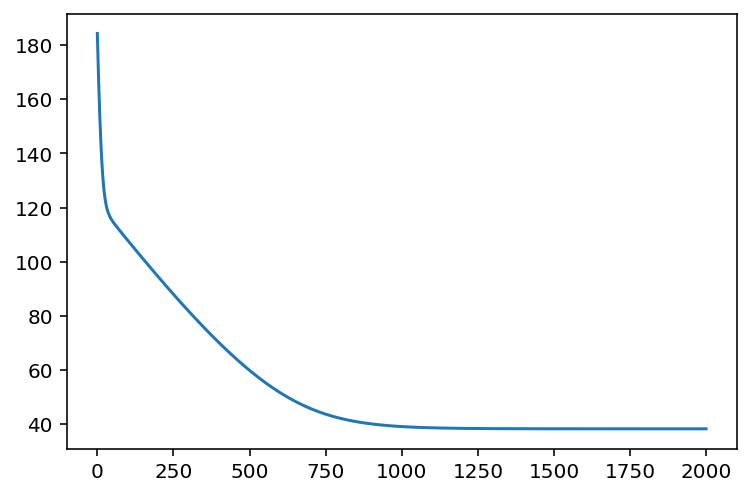

In [ ]:
plt.plot(losses)

In [ ]:
w,b

(-44.92756090768412, 293.0815786721102)

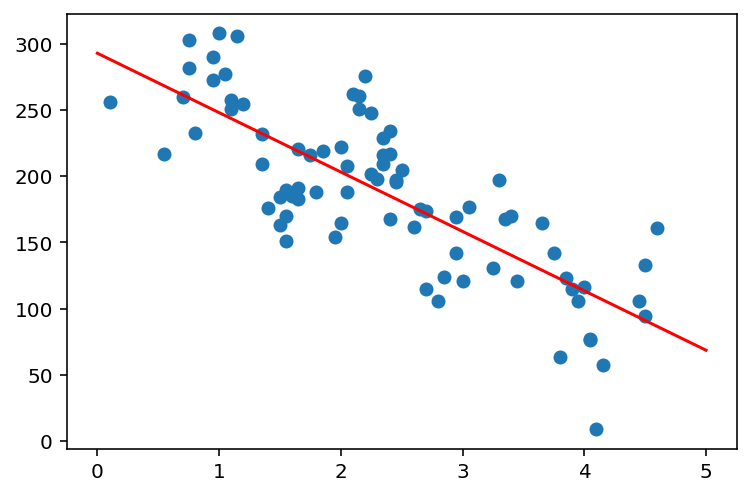

In [ ]:
# 우리의 데이터와 학습이 완료된 모델, 일차함수를 함께 그려보겠습니다.
x = np.linspace(0,5,6)
y = model(x,w,b)

plt.plot(y,c='r')

plt.scatter(macbook['used_years'],macbook['price'])
plt.show()

### 잘 학습되었는지 teste데이터셋으로 확인

In [ ]:
test = pd.read_csv("macbook_test.csv")
print(test.shape)
print(test.head())

(20, 2)
   used_years  price
0        1.20    203
1        1.85    206
2        2.40    191
3        2.85    164
4        3.05    176


In [ ]:
test_x = test['used_years'].values
test_y = test['price'].values

prediction = model(test_x,w,b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [ ]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


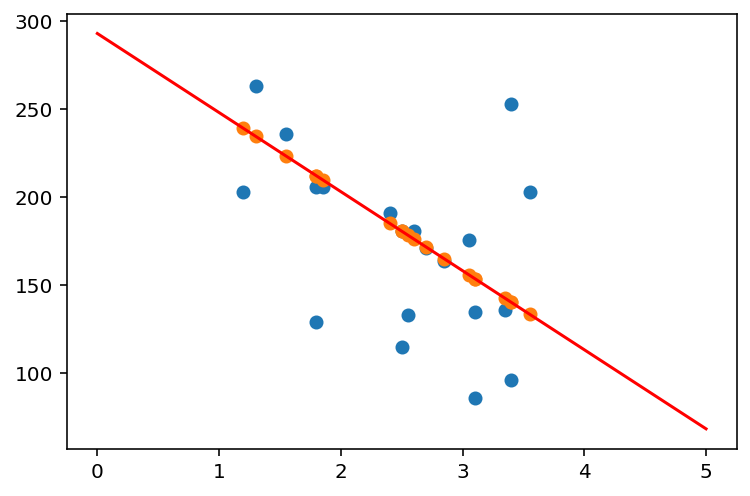

In [ ]:
x = np.linspace(0,5,6)
y = model(x,w,b)
plt.plot(y,c='r')

plt.scatter(test['used_years'],test['price'])

plt.scatter(test['used_years'],test['prediction'])
plt.show()

# Step 2. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기

## (1) 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?

In [120]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [121]:
#tips 데이터셋 사용
tips = sns.load_dataset("tips")
print(tips.shape)
print(tips.head())

(244, 7)
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [122]:
#tips 데이터셋 안에 있는 문자열 데이터 처리하기

import pandas as pd
tips = pd.get_dummies(tips,columns=['sex','smoker','day','time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [123]:
#칼람의 순서를 재배치
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


## (2) 다시 한번 직접 설계해 보는 손실함수

In [124]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values


y = tips['tip'].values

In [125]:
#훈련 데이터와 테스트 데이터 분리하기
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state=42)
print(X_train.shape,y_train.shape)
print(X_test,y_test)

(195, 12) (195,)
[[19.82  2.    1.    0.    0.    1.    0.    0.    1.    0.    0.    1.  ]
 [ 8.77  2.    1.    0.    0.    1.    0.    0.    0.    1.    0.    1.  ]
 [24.55  4.    1.    0.    0.    1.    0.    0.    0.    1.    0.    1.  ]
 [25.89  4.    1.    0.    1.    0.    0.    0.    1.    0.    0.    1.  ]
 [13.    2.    0.    1.    1.    0.    1.    0.    0.    0.    1.    0.  ]
 [17.89  2.    1.    0.    1.    0.    0.    0.    0.    1.    0.    1.  ]
 [28.44  2.    1.    0.    1.    0.    1.    0.    0.    0.    1.    0.  ]
 [12.48  2.    0.    1.    0.    1.    1.    0.    0.    0.    1.    0.  ]
 [14.78  2.    1.    0.    0.    1.    0.    0.    0.    1.    0.    1.  ]
 [15.38  2.    0.    1.    1.    0.    0.    1.    0.    0.    0.    1.  ]
 [18.29  2.    1.    0.    0.    1.    0.    0.    0.    1.    0.    1.  ]
 [10.77  2.    1.    0.    0.    1.    0.    0.    1.    0.    0.    1.  ]
 [10.65  2.    0.    1.    0.    1.    1.    0.    0.    0.    1.    0.  ]
 [14.48 

In [126]:
# W와 b는 랜덤한 값으로 초기값을 설정

import numpy as np
W = np.random.rand(12)
b = np.random.rand()

In [127]:
#모델 준비

def model(X,W,b):
  predictions = 0
  for i in range(12):
    predictions += X[:,i] * W[i]
  predictions += b
  return predictions

In [128]:
def MSE(a,b):
  mse = ((a-b)**2).mean()
  return mse

In [129]:
def MSE(a,b):
  mse = ((a-b)**2).mean()
  return mse

#손실함수 정의
def loss(X,W,b,y):
  predictions = model(X,W,b)
  L = MSE(predictions,y)
  return L

## (3) 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기

In [130]:
def gradient(X,W,b,y):
  N = len(y)
  y_pred = model(X,W,b)
  dw = 1/N * 2 * X.T.dot(y_pred-y)
  db = 2 * (y_pred - y).mean()
  return dw,db

## (4) 모두 준비 되었다면, 모델 학습은 간단하죠!

In [131]:
LEARNING_RATE = 0.0001 #하이퍼 파라미터

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 1.7667
Iteration 20 : Loss 1.6212
Iteration 30 : Loss 1.6021
Iteration 40 : Loss 1.5988
Iteration 50 : Loss 1.5974
Iteration 60 : Loss 1.5963
Iteration 70 : Loss 1.5952
Iteration 80 : Loss 1.5942
Iteration 90 : Loss 1.5931
Iteration 100 : Loss 1.5921
Iteration 110 : Loss 1.5910
Iteration 120 : Loss 1.5900
Iteration 130 : Loss 1.5889
Iteration 140 : Loss 1.5879
Iteration 150 : Loss 1.5868
Iteration 160 : Loss 1.5858
Iteration 170 : Loss 1.5848
Iteration 180 : Loss 1.5837
Iteration 190 : Loss 1.5827
Iteration 200 : Loss 1.5817
Iteration 210 : Loss 1.5807
Iteration 220 : Loss 1.5797
Iteration 230 : Loss 1.5786
Iteration 240 : Loss 1.5776
Iteration 250 : Loss 1.5766
Iteration 260 : Loss 1.5756
Iteration 270 : Loss 1.5746
Iteration 280 : Loss 1.5736
Iteration 290 : Loss 1.5726
Iteration 300 : Loss 1.5716
Iteration 310 : Loss 1.5706
Iteration 320 : Loss 1.5697
Iteration 330 : Loss 1.5687
Iteration 340 : Loss 1.5677
Iteration 350 : Loss 1.5667
Iteration 360 : Loss 1.5658
I

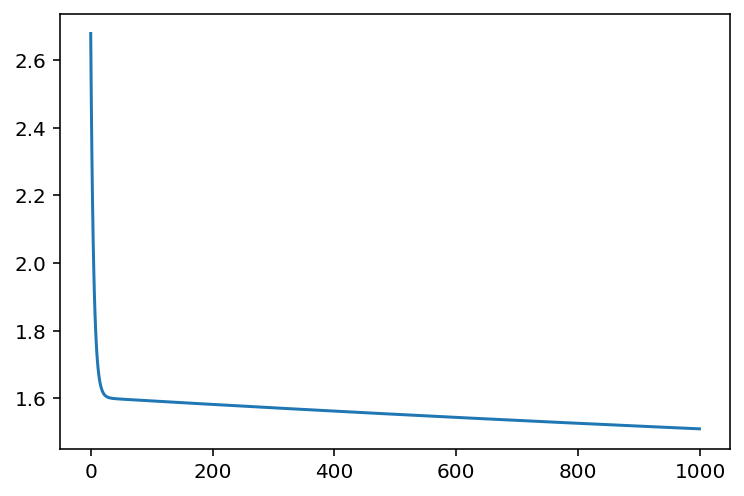

In [132]:
plt.plot(losses)
plt.show()

In [133]:
W,b

(array([0.03743322, 0.08019239, 0.26415803, 0.33812785, 0.40398134,
        0.3044628 , 0.55906092, 0.57573851, 0.9240093 , 0.9518575 ,
        0.19533472, 0.13135984]), 0.7570467468789147)

In [134]:
prediction = model(X_test,W,b)
mse = loss(X_test,W,b,y_test)
mse


1.0617486212046987

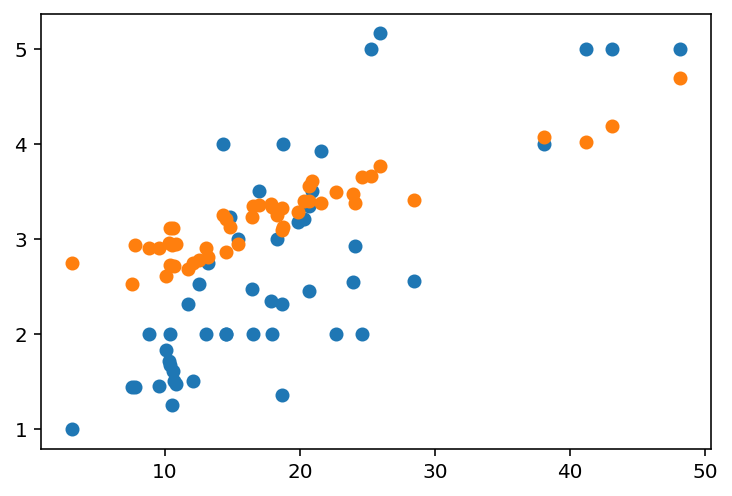

In [135]:
plt.scatter(X_test[:,0],y_test)
plt.scatter(X_test[:,0],prediction)
plt.show()

## (5) 지금까지 한 모든 과정을, 라이브러리로 깔끔하게

### 데이터 준비 

In [136]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips,columns = ['sex','smoker','day','time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

### 모델에 입력할 입력 준비

In [137]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']].values

### 모델에 입력할 결과값 준비

In [138]:
y = tips['tip'].values

### train, test dataset 분리

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)



### 모델 준비하기

In [140]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [141]:
#모델 학습
model.fit(X_train,y_train)

LinearRegression()

In [142]:
predictions = model.predict(X_test)
predictions

array([3.18, 2.  , 2.  , 5.16, 2.  , 2.  , 2.56, 2.52, 3.23, 3.  , 3.  ,
       1.47, 1.5 , 2.  , 1.83, 1.36, 4.  , 3.92, 2.47, 5.  , 2.45, 3.35,
       4.  , 1.45, 3.5 , 2.31, 1.71, 5.  , 2.  , 5.  , 4.  , 1.44, 2.34,
       3.21, 3.5 , 2.92, 1.5 , 5.  , 2.75, 2.  , 1.25, 2.  , 2.55, 1.67,
       2.  , 1.  , 1.61, 2.31, 1.44])

In [143]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,predictions)
mse

3.023631403302475e-30

[19.82  8.77 24.55 25.89 13.   17.89 28.44 12.48 14.78 15.38 18.29 10.77
 10.65 14.48 10.07 18.64 18.71 21.58 16.45 41.19 20.69 20.65 14.31  9.55
 20.9  11.69 10.27 25.28 16.49 48.17 38.07  7.74 17.81 20.29 16.97 24.08
 12.03 43.11 13.16 22.67 10.51 14.52 23.95 10.33 10.34  3.07 10.59 18.69
  7.56]


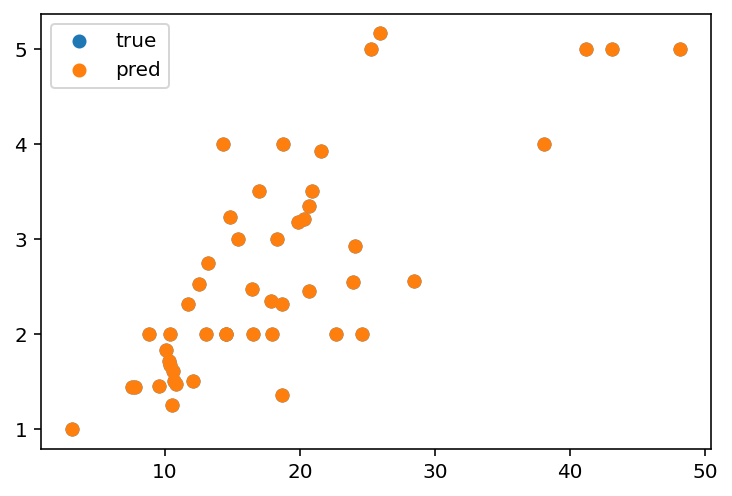

In [144]:
plt.scatter(X_test[:,0],y_test,label='true')
print(X_test[:,0])
#plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:,0],predictions,label='pred')
plt.legend()
plt.show()

# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기

In [392]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target


## (2) 모델에 입력할 데이터 X 준비하기

In [393]:
df_X = np.array(df_X)

## (3) 모델에 예측할 데이터 y 준비하기

In [394]:
df_y = np.array(df_y)

## (4) train 데이터와 test 데이터로 분리하기

In [395]:
X_train,X_test,y_train,y_test = train_test_split(df_X,
                                                 df_y,
                                                 test_size =0.2,
                                                 random_state=7)

## (5) 모델 준비하기

In [396]:
# W와 b는 랜덤한 값으로 초기값을 설정

import numpy as np
W = np.random.rand(10)
b = np.random.rand()

#모델 준비

def model(X,W,b):
  predictions = 0
  for i in range(10):
    predictions += X[:,i] * W[i]
  predictions += b
  return predictions



## (6) 손실함수 loss 정의하기

In [397]:
def MSE(a,b):
  mse = ((a-b)**2).mean()
  return mse

#손실함수 정의
def loss(X,W,b,y):
  predictions = model(X,W,b)
  L = MSE(predictions,y)
  return L

## (7) 기울기를 구하는 gradient 함수 구현하기

In [398]:
def gradient(X,W,b,y):
  N = len(y)
  y_pred = model(X,W,b)
  dw = 1/N * 2 * X.T.dot(y_pred-y)
  db = 2 * (y_pred - y).mean()
  return dw,db

## (8) 하이퍼 파라미터인 학습률 설정하기

In [410]:
LEARNING_RATE = 0.005 #하이퍼 파라미터

## (9) 모델 학습하기

In [411]:
losses = []

for i in range(1, 10000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3433.7692
Iteration 2000 : Loss 3405.3253
Iteration 3000 : Loss 3378.9368
Iteration 4000 : Loss 3354.3775
Iteration 5000 : Loss 3331.4543
Iteration 6000 : Loss 3310.0014
Iteration 7000 : Loss 3289.8763
Iteration 8000 : Loss 3270.9556
Iteration 9000 : Loss 3253.1325


## (10) test 데이터에 대한 성능 확인하기

In [412]:
prediction = model(X_test,W,b)
mse = loss(X_test,W,b,y_test)
mse

# 학습률 : 0.005 -> 2944.7706914701707
# 학습률 : 0.006 -> 2944.773003787861
# 학습률 : 0.009 -> 2944.7786910033083
#여러 조건을 두고 실험을 해봤는데 2944에서 잘 안떨어지네요.

2893.042681194209

In [402]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(y_test,prediction)

48.36046911627252

## (11) 정답 데이터와 예측한 데이터 시각화하기

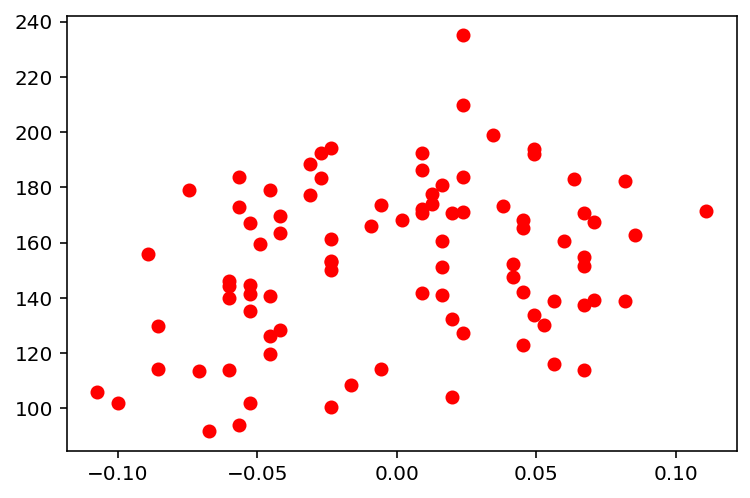

In [403]:
#plt.plot(prediction,c='r')

#plt.scatter(X_test[:,0],y_test,color='blue')    #실제결과
plt.scatter(X_test[:,0],prediction,color='red')   #예측한값
plt.show()
#이게 회귀분석이다 보니까 얼핏 봤을 때는 맞는게 꽤 되는거 같은데
#loss함수 값이 왜 이렇게 클까요?
#loss값이 커서 df_y값을 최대값이 346으로 나누어줬는데요
#loss값은 낮게 나오는데 그래프가 뭔가 이상한 것 같네요.

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

In [382]:
# 데이터셋 업로드
from google.colab import files
myfile = files.upload()

Saving train.csv to train (1).csv


In [420]:
# 데이터 확인하기
train = pd.read_csv("train.csv")
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [384]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = test.dt.year
train['month'] = test.dt.month
train['day'] = test.dt.day
train['hour'] = test.dt.hour
train['minute'] = test.dt.minute
train['second'] = test.dt.second

##(3) year, month, day, hour, minute, second 데이터 개수 시각화하기

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

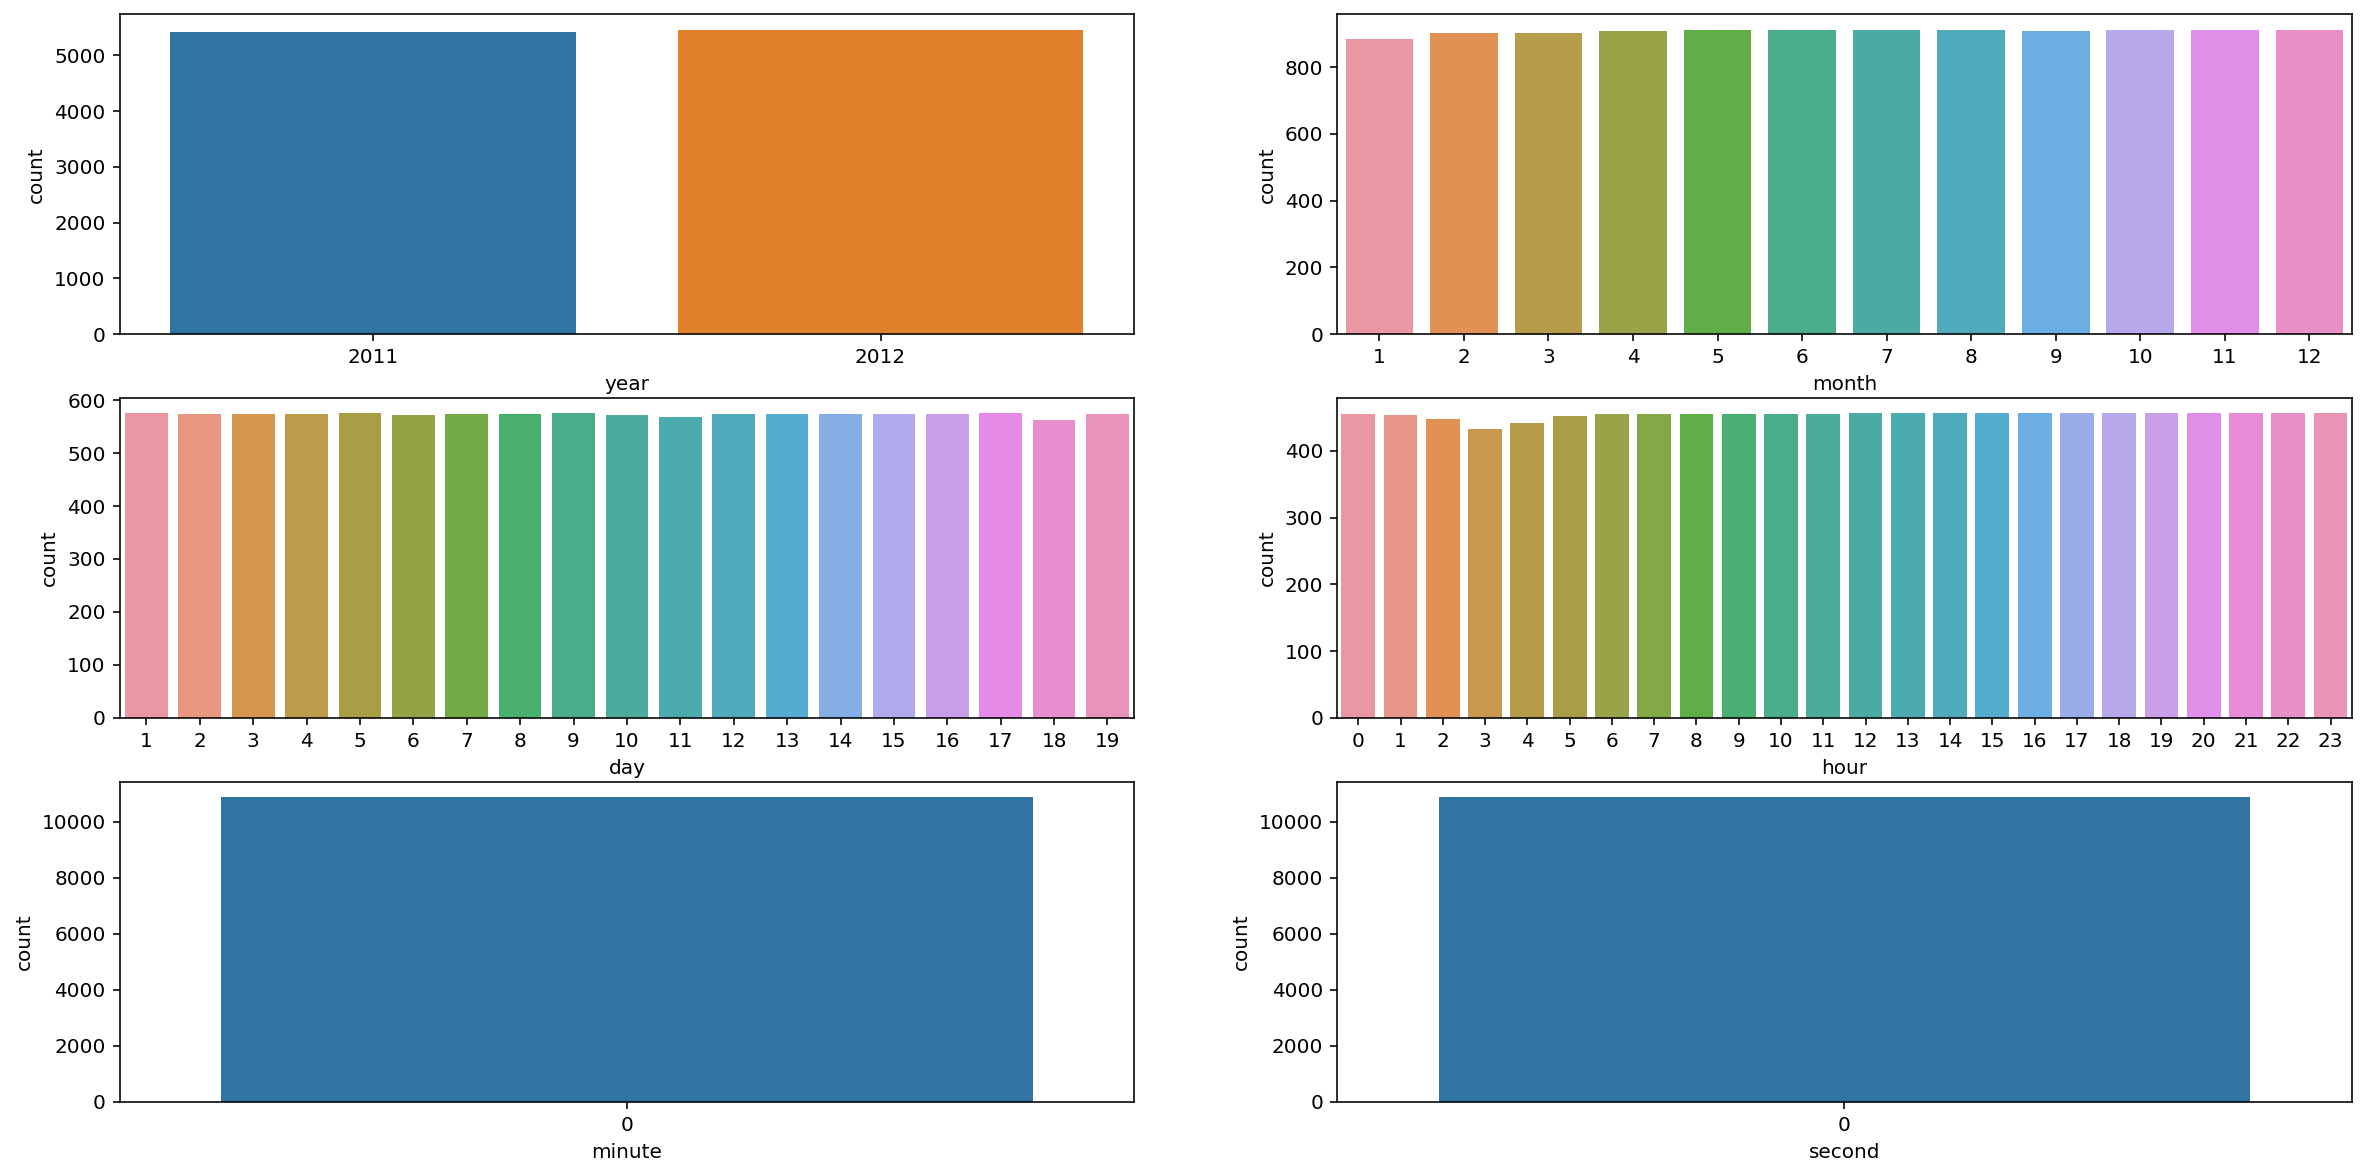

In [385]:
plt.figure(figsize=(20,10))
plt.subplot(3, 2, 1) 
sns.countplot("year", data=train)
plt.subplot(3, 2, 2) 
sns.countplot("month", data=train)
plt.subplot(3, 2, 3) 
sns.countplot("day", data=train)
plt.subplot(3, 2, 4) 
sns.countplot("hour", data=train)
plt.subplot(3, 2, 5) 
sns.countplot("minute", data=train)
plt.subplot(3, 2, 6) 
sns.countplot("second", data=train)

plt.show()

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [386]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
          'humidity', 'windspeed', 'year', 'month', 'day', 'hour']].values


y = train['count'].values

## (5) LinearRegression 모델 학습

In [387]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#모델 학습
model.fit(X_train,y_train)

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [388]:
predictions = model.predict(X_test)
predictions

from sklearn.metrics import mean_squared_error  

mse = mean_squared_error(y_test,predictions)
rmse = mean_squared_error(y_test,predictions) ** 0.5
print(rmse) #<- rmse값 150이하 달성!!!!!!!!!!!!!!!

54.461365198498434


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

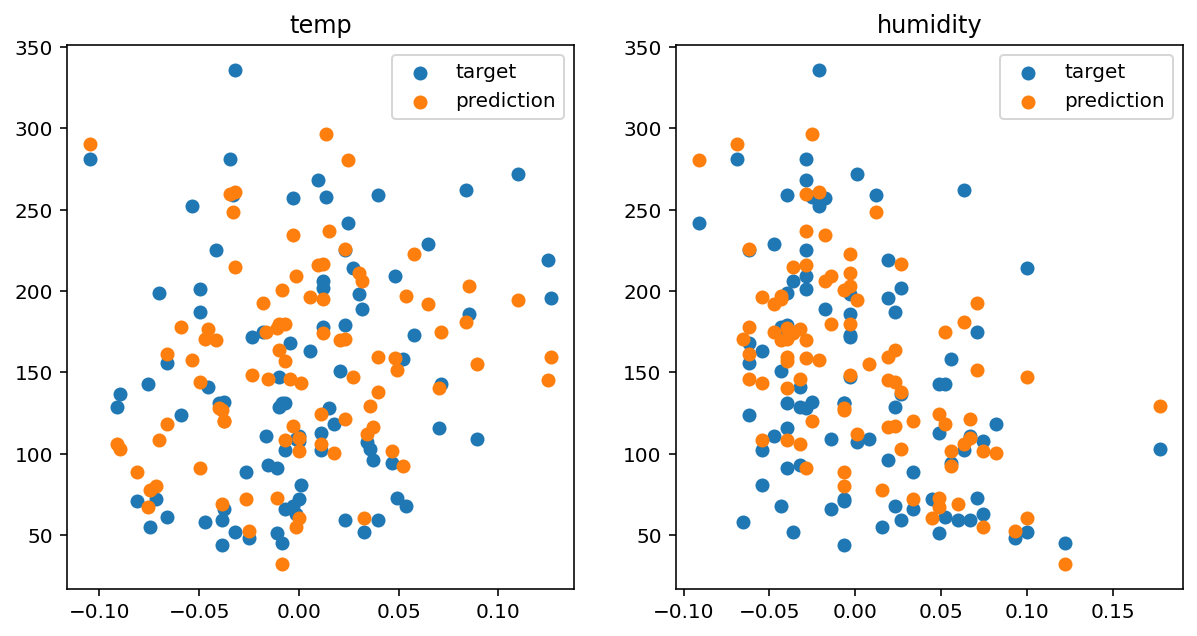

In [389]:

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1) 
plt.scatter(X_test[:,4], y_test, label="target")
plt.scatter(X_test[:,4], predictions, label="prediction")
plt.title("temp")
plt.legend()
plt.subplot(1, 2, 2) 
plt.scatter(X_test[:,6],y_test,label='target')
plt.scatter(X_test[:,6],predictions,label='prediction')
plt.legend()
plt.title("humidity")


plt.show()